This is an implementation of self attention. Notice:
* Notice the dimension of Q, K, V fisrt. 
* Q, K, V has a column for each token, so it's dimension is (num_tokens, d_k).
* Notice Query weights like W-q, W_k, W_V are shared between all tokens. 
* They are used to project the input tokens into a desired dimension.

You can visualize the output as a grid.   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating random Q, K, V matrices

# Input: 3 tokens, each represented by a 4-dimensional vector
tokens = np.array([
    [1.0, 0.0, 1.0, 0.0],  # Token 1
    [0.0, 1.0, 0.0, 1.0],  # Token 2
    [1.0, 1.0, 1.0, 1.0]   # Token 3
])

# Step 1: Create weight matrices for Q, K, V
d_model = tokens.shape[1]  # Dimension of the embeddings
d_k = d_model              # Typically, d_k = d_model

W_q = np.random.rand(d_model, d_k)  # Query weights
W_k = np.random.rand(d_model, d_k)  # Key weights
W_v = np.random.rand(d_model, d_k)  # Value weights

# Step 2: Generate Q, K, V
Q = tokens @ W_q  # Shape: (num_tokens, d_k)
K = tokens @ W_k  # Shape: (num_tokens, d_k)
V = tokens @ W_v  # Shape: (num_tokens, d_k)

# Compute attention scores (dot product of Q and K)
attention_scores = np.dot(Q, K.T)

# Scale and apply softmax to get attention weights
d_k = Q.shape[1]  # Dimensionality of the key vectors
attention_weights = np.exp(attention_scores / np.sqrt(d_k))
attention_weights /= attention_weights.sum(axis=1, keepdims=True)

# Compute weighted sum of V using attention weights
output = np.dot(attention_weights, V)

# Debugging print statements (optional)
print("Q Shape:", Q.shape)
print("K Shape:", K.shape)
print("V Shape:", V.shape)
print("Attention Scores Shape:", attention_scores.shape)
print("Attention Weights Shape:", attention_weights.shape)
print("Output Shape:", output.shape)

Q Shape: (5, 4)
K Shape: (5, 4)
V Shape: (5, 4)
Attention Scores Shape: (5, 5)
Attention Weights Shape: (5, 5)
Output Shape: (5, 4)


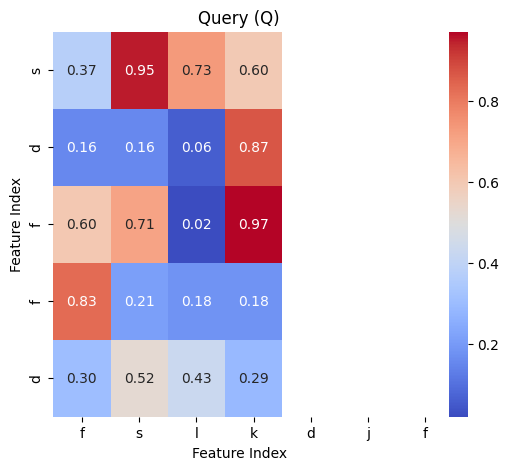

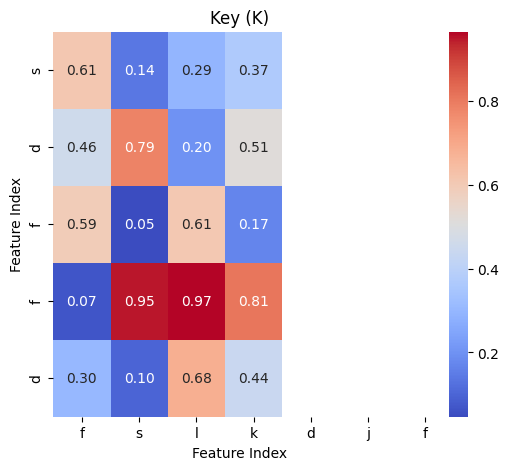

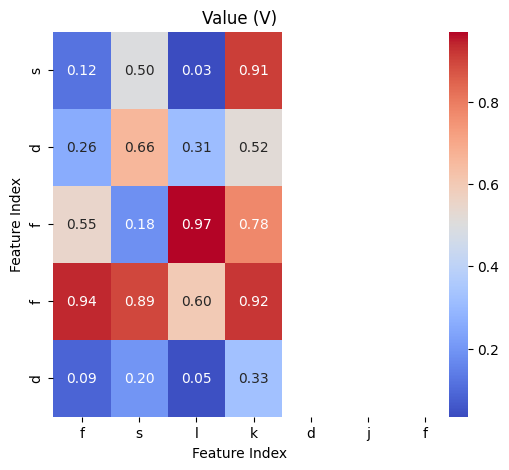

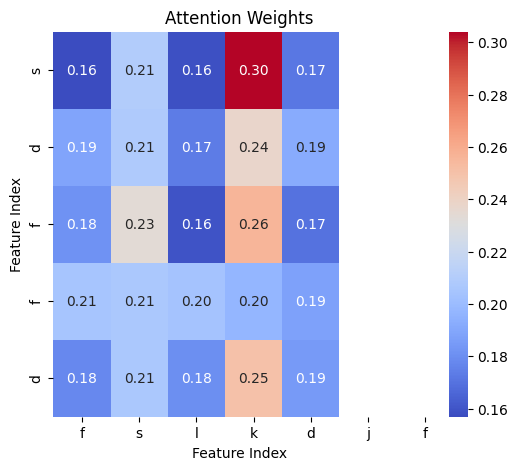

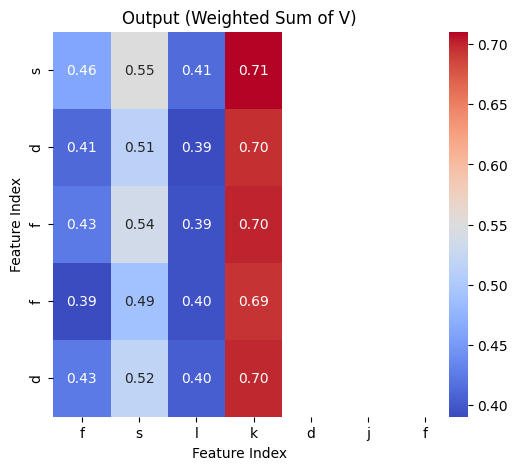

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Visualization function
def plot_heatmap(matrix, title, x_labels='fslkdjf', y_labels='sdffd'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=x_labels, yticklabels=y_labels)
    plt.title(title)
    plt.xlabel("Feature Index")
    plt.ylabel("Feature Index")
    plt.show()

# Visualizing the Matrices
plot_heatmap(Q, "Query (Q)")
plot_heatmap(K, "Key (K)")
plot_heatmap(V, "Value (V)")
plot_heatmap(attention_weights, "Attention Weights")
plot_heatmap(output, "Output (Weighted Sum of V)")
